In [510]:
# Standard imports:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import torch
import torch.nn as nn
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.neighbors import KNeighborsClassifier


In [511]:
# Reading / loading the data:

df = pd.read_csv("/content/sample_data/Iris.csv")

In [512]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [513]:
# Dropping ID column:

df = df.drop("Id", axis=1)

In [514]:
# Checking some data statistics:

len(df)

150

In [515]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [517]:
# Dropping duplicates:

df.drop_duplicates(inplace=True)

df.duplicated().value_counts()

False    147
Name: count, dtype: int64

In [518]:
# Checking for Null values:

df.isnull().value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
False          False         False          False         False      147
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

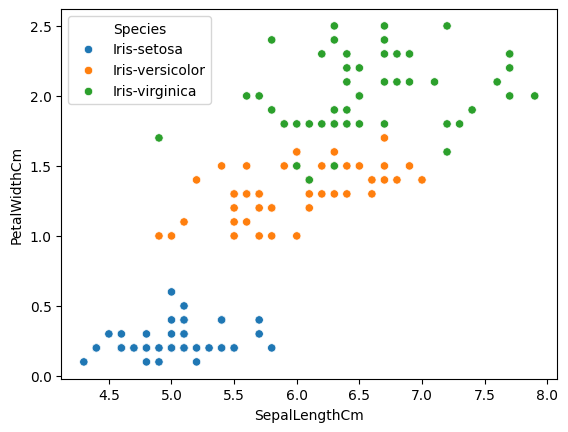

In [519]:
# Plotting

sns.scatterplot(data=df, x='SepalLengthCm', y='PetalWidthCm', hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

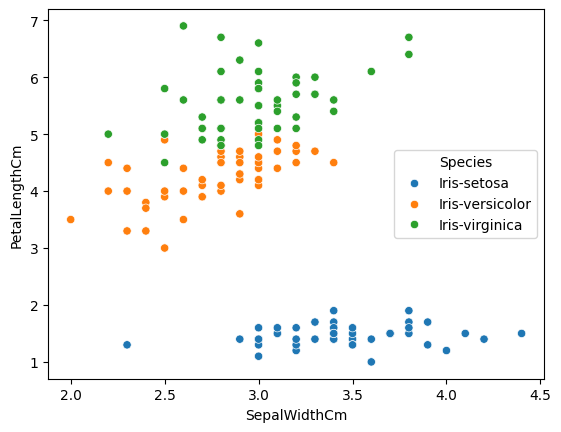

In [520]:
sns.scatterplot(data=df, x='SepalWidthCm', y='PetalLengthCm', hue='Species')

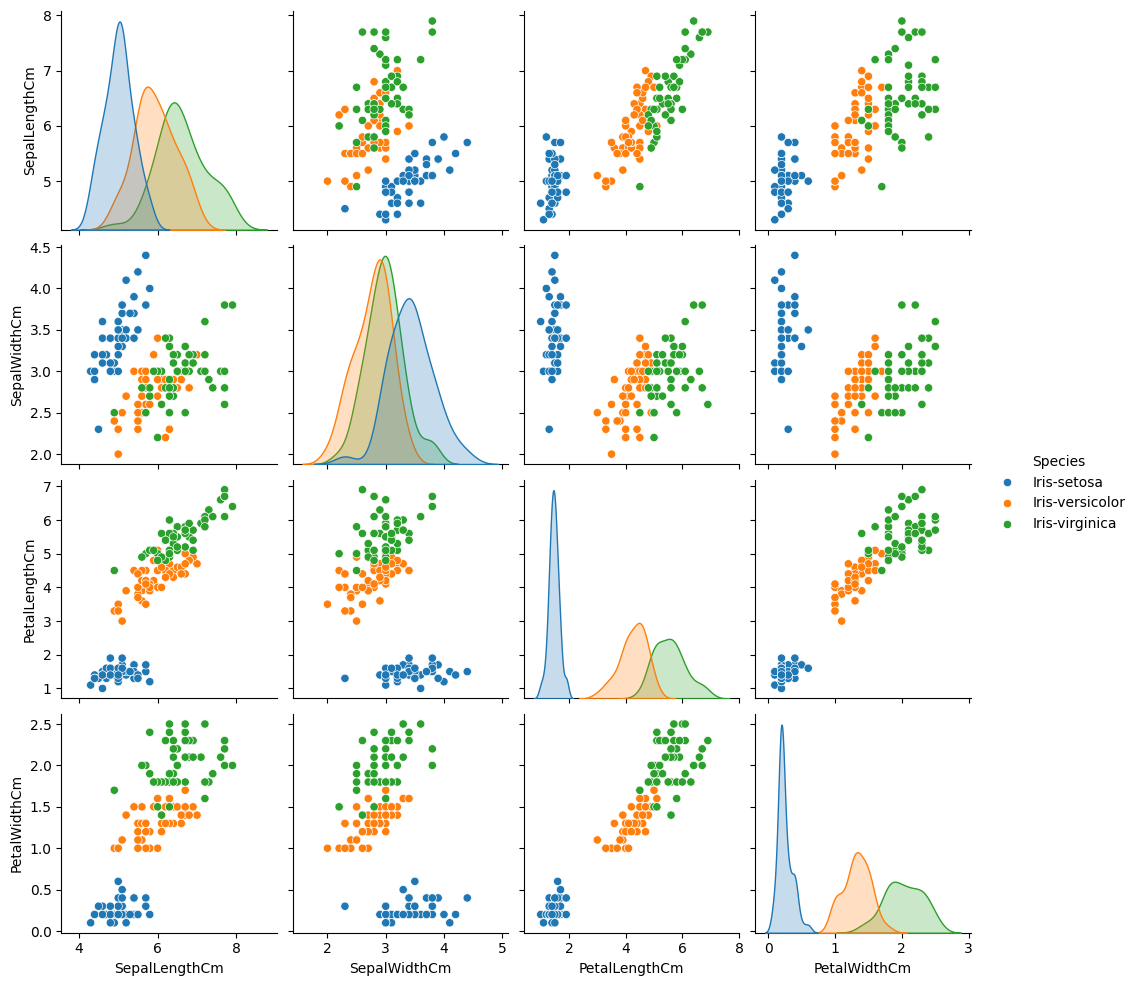

In [521]:
sns.pairplot(data=df, hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='count'>

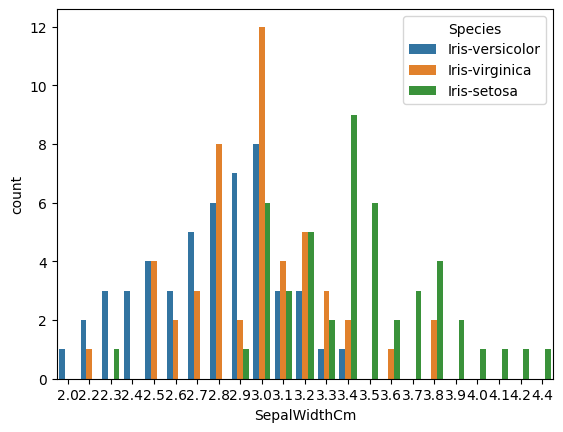

In [522]:
sns.countplot(data=df, x='SepalWidthCm', hue='Species')

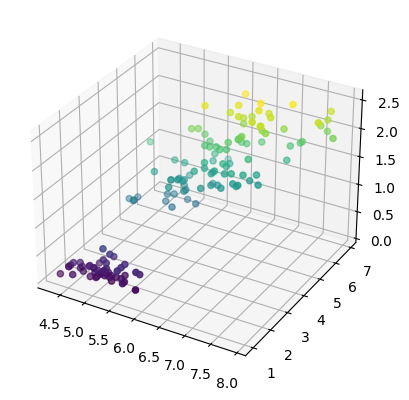

In [523]:
# 3D Plotting:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['SepalLengthCm'],df['PetalLengthCm'], df['PetalWidthCm'], c=df['PetalWidthCm'])

In [524]:
# One hot encoding labels:

df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2], inplace=True)

<Axes: >

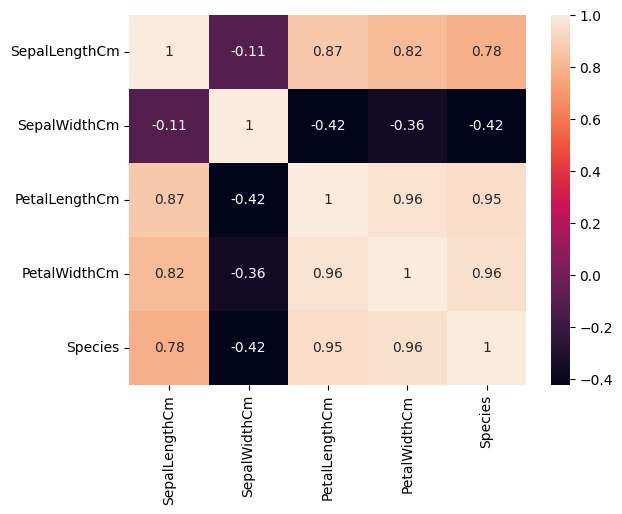

In [525]:
# Visualizing data:

sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

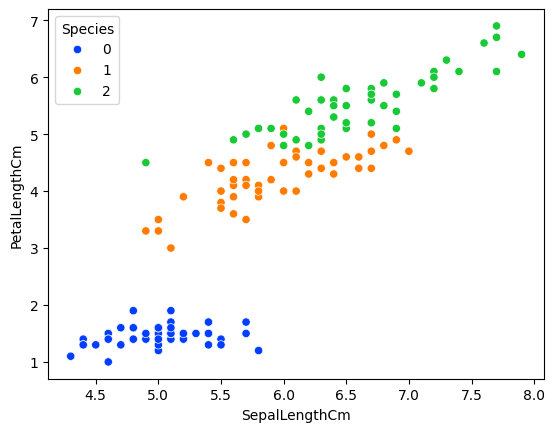

In [526]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species',data=df, palette="bright")

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

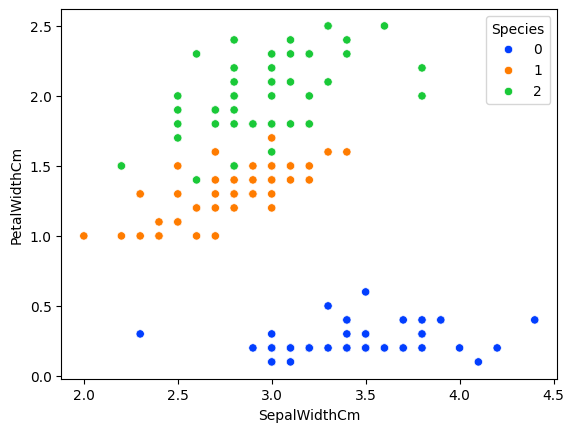

In [527]:
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df, palette="bright")

In [528]:
# Seperating features vs. labels:

X = df.drop('Species', axis=1).values

y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


In [529]:
# Scaling data, only train data is scaled, fitted and transformed. Test data is only transformed in order to prevent information leakage:

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [530]:
# Initiating KNN object:

knn_model = KNeighborsClassifier(n_neighbors=3) # Randomly choosing neighbour as 3.

In [531]:
# Fitting the model to scaled data:

knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [532]:
# Predictions:

y_pred = knn_model.predict(scaled_X_test)

In [533]:
# Performance & Evaluation metrices:

accuracy_score(y_test, y_pred)*100

100.0

In [534]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]])

In [535]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We achieved 100% accuracy.

Text(0.5, 0, 'K Value')

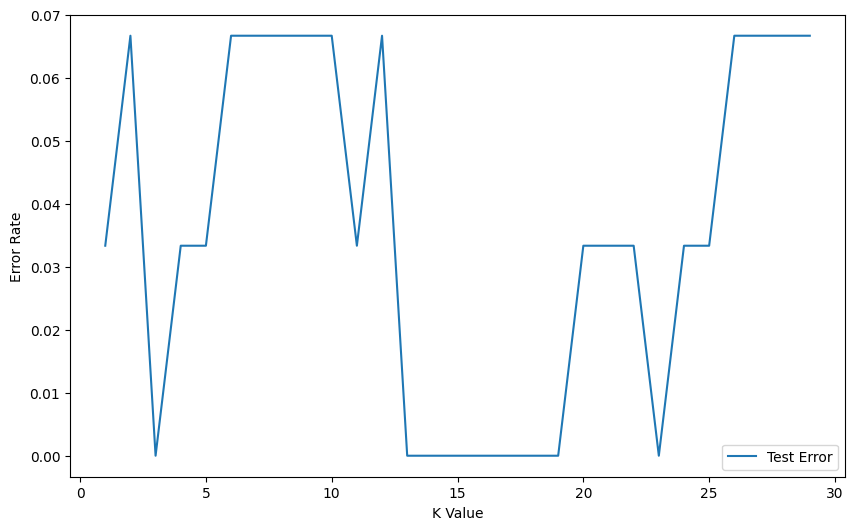

In [536]:
# Trying different values of k, Elbow Method:

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

plt.figure(figsize=(10,6),dpi=100)
plt.plot(range(1,30), test_error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

The graph suggests to use K=3 which I already did. I found it confusing so I did a Grid Search.  Instead of Elbow method for K values, I used cross-validation as below to find values of k. I have used pipeline method for this:


In [537]:
# Initating KNN and Scalar objects and assigning them to a pipeline:

scaler = StandardScaler()

knn = KNeighborsClassifier()

X_opt = df.drop('Species', axis=1).values

y_opt = df['Species'].values

X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.2, random_state=33)

operations = [('scaler', scaler),('knn', knn)]

pipe = Pipeline(operations)

In [538]:
# Selecting number of K values to try:

k_values = list(range(1,30))

param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')

In [539]:
full_cv_classifier.fit(X_train_opt, y_train_opt)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [540]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=6))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=6),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 6,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Grid search is suggesting to choose k = 6,  'knn__n_neighbors': 6,




Re-training using K=6.

In [541]:
knn_model.opt = KNeighborsClassifier(n_neighbors=6)

knn_model.opt.fit(X_train_opt, y_train)

y_pred_opt = knn_model.opt.predict(X_test)


In [542]:
accuracy_score(y_test_opt, y_pred_opt)*100

96.66666666666667

In [543]:
confusion_matrix(y_test, y_pred_opt)

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]])

In [544]:
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

